# ARIMA 
(Auto Regression + Integration + Moving Average)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sms
import seaborn as sns

In [2]:
df = pd.read_csv("airline_passengers.csv")
df

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [3]:
df.isna().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [11]:
df.loc[144]

Month                      International airline passengers: monthly tota...
Thousands of Passengers                                                  NaN
Name: 144, dtype: object

In [12]:
df.dropna(axis='rows',inplace=True)

In [13]:
df

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


In [14]:
df.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [16]:
df['Month'] = pd.to_datetime(df.Month)

In [17]:
df

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0
...,...,...
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [19]:
df.set_index('Month',inplace=True)

In [20]:
df

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


<AxesSubplot:xlabel='Month'>

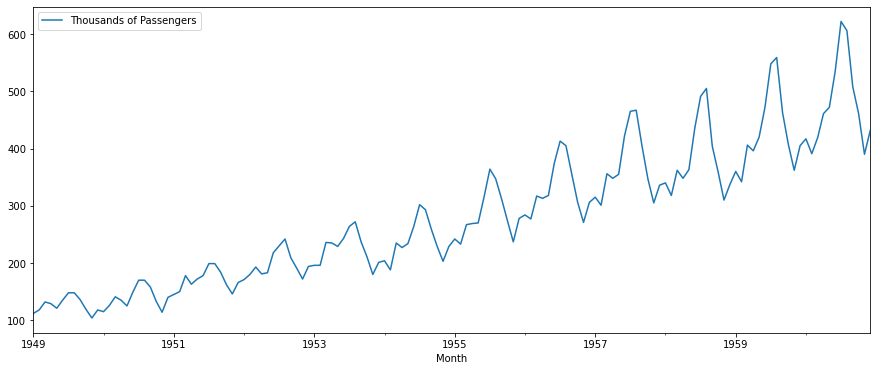

In [22]:
df.plot(figsize=(15,6))

In [23]:
from statsmodels.tsa.stattools import adfuller

In [26]:
def adf_test(series):
    r = adfuller(series)
    print('ADF STAT: {}'.format(r[0]))
    print('P value: {}'.format(r[1]))
    
    if r[1] <= 0.05:
        print('String and it is stationary')
    else:
        print("Weak and it is non stationary")

In [27]:
adf_test(df['Thousands of Passengers'])

ADF STAT: 0.8153688792060482
P value: 0.991880243437641
Weak and it is non stationary


In [28]:
df['Passengers first difference'] = df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(1)

In [29]:
df

,Thousands of Passengers,Passengers first difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0
...,...,...
1960-08-01,606.0,-16.0
1960-09-01,508.0,-98.0
1960-10-01,461.0,-47.0


In [30]:
adf_test(df['Passengers first difference'].dropna())

ADF STAT: -2.8292668241699994
P value: 0.0542132902838255
Weak and it is non stationary


In [31]:
df['Passengers second difference'] = df['Passengers first difference'] - df['Passengers first difference'].shift(1)

In [32]:
df.head()

,Thousands of Passengers,Passengers first difference,Passengers second difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0


In [33]:
adf_test(df['Passengers second difference'].dropna())

ADF STAT: -16.384231542468505
P value: 2.7328918500142407e-29
String and it is stationary


In [36]:
df['Passengers 12 difference'] = df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(12)

In [37]:
adf_test(df['Passengers 12 difference'].dropna())

ADF STAT: -3.383020726492481
P value: 0.011551493085514954
String and it is stationary


In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

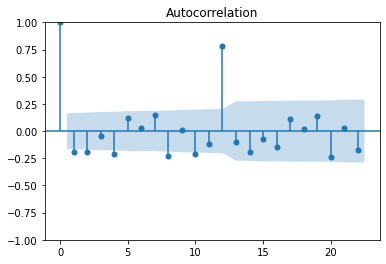

In [41]:
acf = plot_acf(df['Passengers second difference'].dropna())

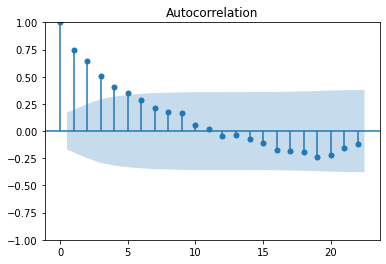

In [44]:
acf12 = plot_acf(df['Passengers 12 difference'].dropna())

In [43]:
df.head(3)

,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers 12 difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN


G:\Himel.conda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


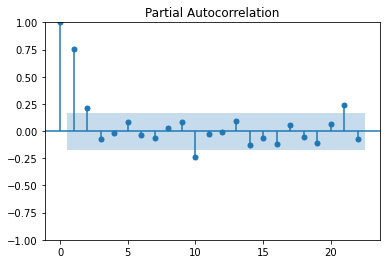

In [45]:
pacf12 = plot_pacf(df['Passengers 12 difference'].dropna())

In [46]:
from datetime import datetime, timedelta
train_data_end = datetime(1955,12,1)
test_data_end = datetime(1960,12,1)

In [47]:
train_data = df[:train_data_end]
test_data = df[train_data_end + timedelta(days=1):test_data_end]

In [48]:
pre_start = test_data.index[0]
pre_end = test_data.index[-1]

In [49]:
test_data

,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers 12 difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [57]:
from statsmodels.tsa.arima.model import ARIMA

In [58]:
train_data

,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers 12 difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [59]:
model_ARIMA = ARIMA(train_data['Thousands of Passengers'], order = (10,2,0))

G:\Himel.conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
G:\Himel.conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
G:\Himel.conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [60]:
model = model_ARIMA.fit()

In [61]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(10, 2, 0)   Log Likelihood                -357.239
Date:                     Thu, 09 Nov 2023   AIC                            736.477
Time:                             22:26:22   BIC                            762.951
Sample:                         01-01-1949   HQIC                           747.106
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5166      0.121     -4.262      0.000      -0.754      -0.279
ar.L2         -0.7204      0.121     -5.940      0.000      -0.958      -0.483
ar.L3         -0.4857      0.125     -3.876      0.000      -0.731      -0.240
ar.L4         -0.7505      0.129     -5.819      0.000      -1.003      -0.498
ar.L5         -0.5062      0.169     -2.991      0.003      -0.838      -0.175
ar.L6         -0.5200      0.141     -3.683      0.000      -0.797      -0.243
ar.L7         -0.3051      0.143     -2.127      0.033      -0.586      -0.024
ar.L8         -0.5939      0.155     -3.833      0.000      -0.898      -0.290
ar.L9         -0.2963      0.132     -2.241      0.025      -0.555      -0.037
ar.L10        -0.4825      0.110     -4.376      0.000      -0.699      -0.266
sigma2       336.0939     66.064      5.087      0.000     206.612     465.576
===================================================================================
Ljung-Box (L1) (Q):                  10.86   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.00   Prob(JB):                         0.54
Heteroskedasticity (H):               2.85   Skew:                             0.24
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
#prediction
pre_start = test_data.index[0]
pre_end = test_data.index[-1]
print(pre_start)
print(pre_end)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [65]:
p = model.predict(start = pre_start, end = pre_end)
residule = test_data['Thousands of Passengers']-p

In [66]:
residule

Month
1956-01-01    -16.183612
1956-02-01    -32.478354
1956-03-01      0.556987
1956-04-01      5.172458
1956-05-01     -0.544231
1956-06-01     25.077921
1956-07-01     46.979715
1956-08-01     58.432469
1956-09-01     22.879034
1956-10-01     -1.734753
1956-11-01    -40.623910
1956-12-01    -33.828195
1957-01-01    -34.840403
1957-02-01    -55.098230
1957-03-01      5.312176
1957-04-01     -2.080460
1957-05-01     -6.157689
1957-06-01     40.783489
1957-07-01     82.680631
1957-08-01     94.147425
1957-09-01     39.889907
1957-10-01     -9.108921
1957-11-01    -66.293786
1957-12-01    -49.323592
1958-01-01    -52.077833
1958-02-01    -73.405846
1958-03-01    -26.404576
1958-04-01    -43.572852
1958-05-01    -39.448075
1958-06-01     21.744321
1958-07-01     80.146590
1958-08-01     97.329461
1958-09-01      1.513669
1958-10-01    -47.089143
1958-11-01   -108.125309
1958-12-01    -89.012370
1959-01-01    -69.205575
1959-02-01    -85.352226
1959-03-01    -22.150982
1959-04-01    -36.7

<AxesSubplot:ylabel='Density'>

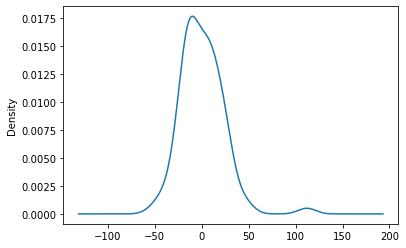

In [67]:
model.resid.plot(kind='kde')

In [68]:
test_data['Predicted ARIMA'] = p

C:\Users\Himel\AppData\Local\Temp\ipykernel_9376\3541788382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted ARIMA'] = p


In [70]:
p

1956-01-01    300.183612
1956-02-01    309.478354
1956-03-01    316.443013
1956-04-01    307.827542
1956-05-01    318.544231
1956-06-01    348.922079
1956-07-01    366.020285
1956-08-01    346.567531
1956-09-01    332.120966
1956-10-01    307.734753
1956-11-01    311.623910
1956-12-01    339.828195
1957-01-01    349.840403
1957-02-01    356.098230
1957-03-01    350.687824
1957-04-01    350.080460
1957-05-01    361.157689
1957-06-01    381.216511
1957-07-01    382.319369
1957-08-01    372.852575
1957-09-01    364.110093
1957-10-01    356.108921
1957-11-01    371.293786
1957-12-01    385.323592
1958-01-01    392.077833
1958-02-01    391.405846
1958-03-01    388.404576
1958-04-01    391.572852
1958-05-01    402.448075
1958-06-01    413.255679
1958-07-01    410.853410
1958-08-01    407.670539
1958-09-01    402.486331
1958-10-01    406.089143
1958-11-01    418.125309
1958-12-01    426.012370
1959-01-01    429.205575
1959-02-01    427.352226
1959-03-01    428.150982
1959-04-01    432.790841


<AxesSubplot:xlabel='Month'>

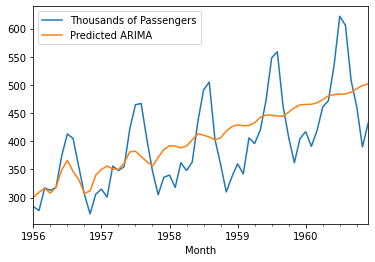

In [69]:
test_data[['Thousands of Passengers', 'Predicted ARIMA']].plot()

In [72]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [73]:
model_sarimax = SARIMAX(train_data['Thousands of Passengers'], order = (0,2,0), seasonal_order=(1,0,1,12))

G:\Himel.conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
G:\Himel.conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [74]:
model_fit = model_sarimax.fit()

In [75]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:              Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(0, 2, 0)x(1, 0, [1], 12)   Log Likelihood                -346.677
Date:                              Thu, 09 Nov 2023   AIC                            699.354
Time:                                      22:41:39   BIC                            706.575
Sample:                                  01-01-1949   HQIC                           702.253
                                       - 12-01-1955                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9227      0.065     14.282      0.000       0.796       1.049
ma.S.L12      -0.3372      0.150     -2.253      0.024      -0.631      -0.044
sigma2       228.1795     38.404      5.942      0.000     152.909     303.450
===================================================================================
Ljung-Box (L1) (Q):                  22.39   Jarque-Bera (JB):                 0.39
Prob(Q):                              0.00   Prob(JB):                         0.82
Heteroskedasticity (H):               2.20   Skew:                            -0.05
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [76]:
test_data.tail()

,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers 12 difference,Predicted ARIMA
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,483.883975
1960-09-01,508.0,-98.0,-82.0,45.0,487.184098
1960-10-01,461.0,-47.0,51.0,54.0,493.432778
1960-11-01,390.0,-71.0,-24.0,28.0,498.930067
1960-12-01,432.0,42.0,113.0,27.0,502.159819


In [77]:
pre_start = test_data.index[0]
pre_end = test_data.index[-1]
print(pre_start)
print(pre_end)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [79]:
p1 = model_fit.predict(start = pre_start, end = pre_end)
residule1 = test_data['Thousands of Passengers']-p1

<AxesSubplot:xlabel='Month'>

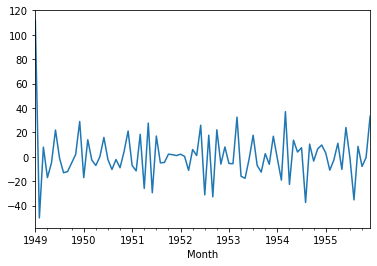

In [81]:
model_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

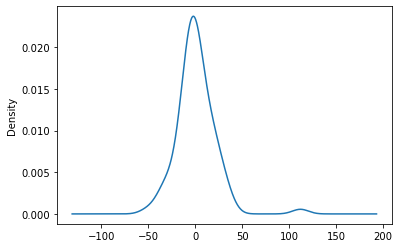

In [82]:
model_fit.resid.plot(kind = 'kde')

In [83]:
test_data['Predict SARIMA'] = p1

C:\Users\Himel\AppData\Local\Temp\ipykernel_9376\2568467408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predict SARIMA'] = p1


In [84]:
test_data

,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers 12 difference,Predicted ARIMA,Predict SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,300.183612,305.944583
1956-02-01,277.0,-7.0,-13.0,44.0,309.478354,317.259901
1956-03-01,317.0,40.0,47.0,50.0,316.443013,369.136602
1956-04-01,313.0,-4.0,-44.0,44.0,307.827542,387.726727
1956-05-01,318.0,5.0,9.0,48.0,318.544231,408.840698
1956-06-01,374.0,56.0,51.0,59.0,348.922079,462.420952
1956-07-01,413.0,39.0,-17.0,49.0,366.020285,519.977059
1956-08-01,405.0,-8.0,-47.0,58.0,346.567531,528.516919
1956-09-01,355.0,-50.0,-42.0,43.0,332.120966,517.549666


<AxesSubplot:xlabel='Month'>

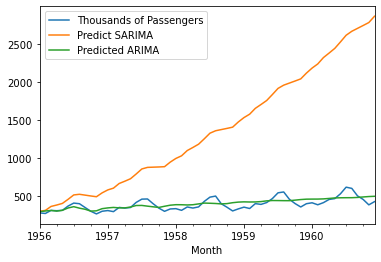

In [85]:
test_data[['Thousands of Passengers','Predict SARIMA', 'Predicted ARIMA']].plot()